S13
/data/home/viscent/Light
/data/home/viscent/Light/Light/S13 Data.cnt
Reading 0 ... 1181149  =      0.000 ...  2362.298 secs...


<ipython-input-39-f880b5b05ac3>:17: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(file_path, preload=True)


file info:
<Info | 9 non-empty values
 bads: 1 items (Trigger)
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>
channel names:
['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'VEO', 'Trigger']
time period:
1181150
events:
Used Annotations descriptions: ['11', '12', '8', '9']
{'random_flicker-60s': 1, 'random_rest-300s': 2, '40Hz_rest-300s': 3, '40Hz_flicker-60s': 4}
1 duplicate electrode labels found:
M1/Trigger
Plotting 66 uniq

/data/home/viscent/Light/LangouEEG/langouEEG.py:127: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mne.viz.plot_montage(layout)


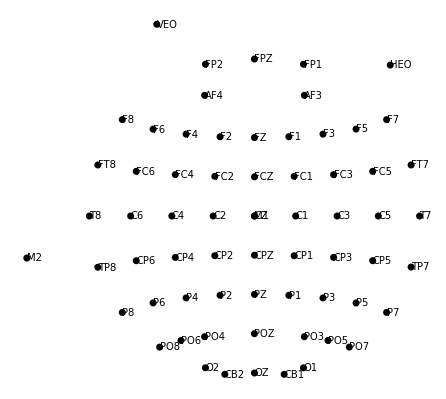

Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 5 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 5 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 5 events and 30001 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 5 events and 13501 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection ite

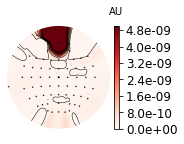

No baseline correction applied


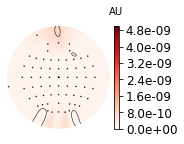

No baseline correction applied


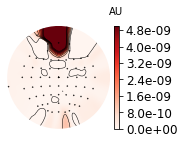

No baseline correction applied


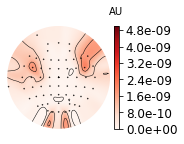

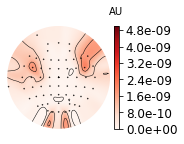

In [39]:
import os
import numpy as np
import mne
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from copy import deepcopy
from mne.preprocessing import create_ecg_epochs, create_eog_epochs, read_ica
import sys
from langouEEG import *

def initData_clean(subject_name,picks_str=['O1','O2','OZ']):
    file_path = dataRoot+'/Light/'+subject_name + " Data.cnt"
    print(dataRoot)
    print(file_path)
    raw = mne.io.read_raw_cnt(file_path, preload=True)
    # picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=True, exclude='bads')
    picks = picks_str
    if not os.path.exists(dataRoot+('/Light')):
        os.mkdir('Light')
    return raw,picks,picks_str

# picks_list = [['M1','M2'],['O1','O2','OZ'],['PO3','PO4','POZ'],['P1','P2','PZ'],['CP1','CP2','CPZ'],['C1','C2','CZ'],['FC1','FC2','FCZ'],['F1','F2','FZ']]
# pos_list = ['M','O','PO','P','CP','C','FC','F']
## For debugging 
# picks_list = [['O1','O2','OZ']]
epochs_4F, epochs_4R, epochs_RF, epochs_RR = [], [], [], []
picks_list = ['eeg']
pos_list = ['O']
for j in range(0, len(pos_list)):
    init_prog()
    for i in range(13,14):
        if i<10:
            subject_name='S0'+str(i)
        else:
            subject_name='S'+str(i)
        print(subject_name)
        raw,picks,picks_str = initData_clean(subject_name, picks_str=picks_list[j])
        events, event_dict=extractEvents(raw)
        initLayout(raw)
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs(raw,events,picks)
        # epochs = epoch_RR,epoch_RF,epoch_4R,epoch_4F
        # epoch_4F.plot_psd_topomap(bands=bands)
        # epoch_RR.plot_psd_topomap(bands=bands)
        epochs_4F.append(epoch_4F)
        epochs_4R.append(epoch_4R)
        epochs_RF.append(epoch_RF)
        epochs_RR.append(epoch_RR)
bands = [(0, 4, 'Delta'), (4, 8, 'Theta'), (8, 12, 'Alpha'),
         (12, 30, 'Beta'), (30, 50, 'Low Gamma'), (39, 41, 'Target')]
epochs_4F = mne.concatenate_epochs(epochs_4F)
epochs_4R = mne.concatenate_epochs(epochs_4R)
epochs_RF = mne.concatenate_epochs(epochs_RF)
epochs_RR = mne.concatenate_epochs(epochs_RR)

freqs = np.logspace(*np.log10([30, 50]), num=8)
n_cycles = freqs / 2.0
power_4F, itc = tfr_morlet(epoch_4F, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)
power_4R, itc = tfr_morlet(epoch_4R, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)
power_RF, itc = tfr_morlet(epoch_RF, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)
power_RR, itc = tfr_morlet(epoch_RR, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True, decim=3, n_jobs=1)
# power_4F.plot(j, baseline=None, mode="logratio")
# epoch_4R.plot_psd_topomap(bands=bands)
# epoch_4F.plot_psd_topomap(bands=bands)
# epoch_RR.plot_psd_topomap(bands=bands)
# epoch_RF.plot_psd_topomap(bands=bands)
tminr, tmaxr=3, 60
tminf, tmaxf = 20, 30
fmin, fmax=39, 41
power_4R.plot_topomap(ch_type='eeg', tmin=tminr, tmax=tmaxr, fmin=fmin, fmax=fmax, baseline=None, vmin=0, vmax=5e-9, mode='logratio')
power_4F.plot_topomap(ch_type='eeg', tmin=tminf, tmax=tmaxf, fmin=fmin, fmax=fmax, baseline=None, vmin=0, vmax=5e-9, mode='logratio')
power_RR.plot_topomap(ch_type='eeg', tmin=tminr, tmax=tmaxr, fmin=fmin, fmax=fmax, baseline=None, vmin=0, vmax=5e-9, mode='logratio')
power_RF.plot_topomap(ch_type='eeg', tmin=tminf, tmax=tmaxf, fmin=fmin, fmax=fmax, baseline=None, vmin=0, vmax=5e-9, mode='logratio')